In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


In [12]:
df=pd.read_csv(r"C:\Users\janha\Desktop\mlproject\notebook\data\stud.csv")

In [13]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [14]:
X=df.drop(columns=['math score'],axis=1)
y=df['math score']

In [16]:
num_features=X.select_dtypes(exclude=['object']).columns
cat_features=X.select_dtypes(include=['object']).columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [17]:
X=preprocessor.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [23]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse= mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [27]:
from sklearn.ensemble import AdaBoostRegressor

In [36]:
models={
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoost Regressor': CatBoostRegressor(verbose=0),
    'Adaboost Regressor': AdaBoostRegressor(),
}
model_list=[]
r2_list=[]
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)
    print("Model performance on training set:")
    print(f"Root Mean Squared Error: {model_train_rmse}")
    print(f"Mean Absolute Error: {model_train_mae}")
    print(f"R2 Score: {model_train_r2}")
    print("-" * 50)
    print("Model performance on test set:")
    print(f"Root Mean Squared Error: {model_test_rmse}")
    print(f"Mean Absolute Error: {model_test_mae}")
    print(f"R2 Score: {model_test_r2}")
    print("=" * 50)
    print("\n")
    


Linear Regression
Model performance on training set:
Root Mean Squared Error: 5.327359474652332
Mean Absolute Error: 4.27880859375
R2 Score: 0.8741136595329527
--------------------------------------------------
Model performance on test set:
Root Mean Squared Error: 5.40960336750764
Mean Absolute Error: 4.2259375
R2 Score: 0.8797402769404664


Ridge Regression
Model performance on training set:
Root Mean Squared Error: 5.323324922741654
Mean Absolute Error: 4.264987823725981
R2 Score: 0.8743042615212909
--------------------------------------------------
Model performance on test set:
Root Mean Squared Error: 5.390387016935638
Mean Absolute Error: 4.21110068801426
R2 Score: 0.8805931485028738


Lasso Regression
Model performance on training set:
Root Mean Squared Error: 6.593815587795566
Mean Absolute Error: 5.206302661246526
R2 Score: 0.8071462015863456
--------------------------------------------------
Model performance on test set:
Root Mean Squared Error: 6.51969453566742
Mean Absol

In [37]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
1,Ridge Regression,0.880593
0,Linear Regression,0.879740
7,CatBoost Regressor,0.851632
8,Adaboost Regressor,0.849818
5,Random Forest Regressor,0.847698
6,XGBRegressor,0.827797
2,Lasso Regression,0.825320
3,K-Neighbors Regressor,0.783898
4,Decision Tree Regressor,0.736704


In [39]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train, y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" % score)

Accuracy of the model is 87.97


Text(0, 0.5, 'Predicted Values')

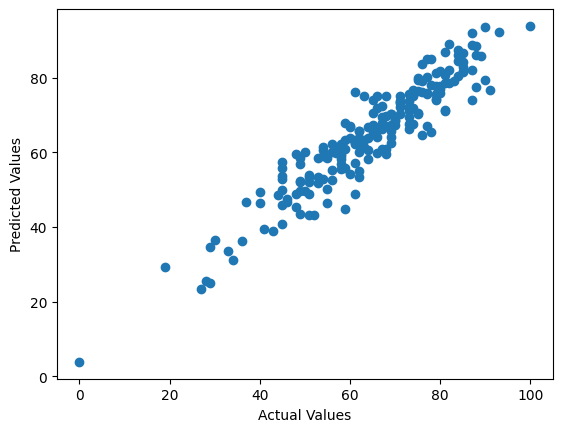

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

<Axes: xlabel='math score'>

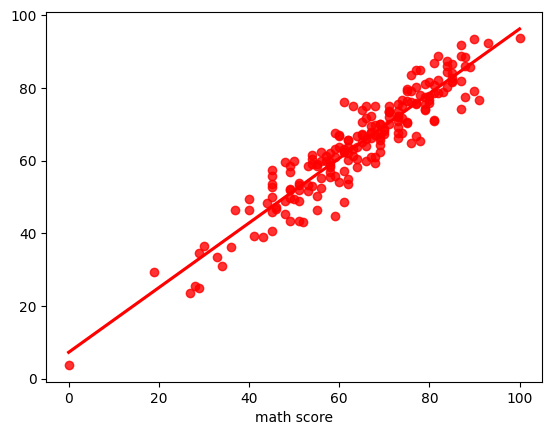

In [41]:
sns.regplot(x=y_test, y=y_pred,ci=None,color='red')

In [42]:
pred_df=pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred,'Difference': y_test - y_pred})
pred_df

,Actual Values,Predicted Values,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
